# Regression Example

Example using the [seaborn tips data](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) to simulate a regression.

In [1]:
import pandas as pd
import seaborn as sb
from patsy.highlevel import dmatrices
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import statsmodels.formula.api as smf

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/envs/statcomp/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Import tips data from Seaborn

In [2]:
data: pd.DataFrame = sb.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question: On average, who tips more (percentage wise), men or women?
Looking at the percentage of tips in relation to total bill seeks to isolate the size of the bill from gender as a factor in tip size. (normalized)

outcome = tip as a percentage of total bill (compute)
drivers (inputs) = gender

we think that there is a difference across the genders and so we will regress the percentage of total bill on the gender

In [3]:
dmatrices("I(tip / total_bill) ~ C(sex)", data)

(DesignMatrix with shape (244, 1)
   I(tip / total_bill)
               0.05945
               0.16054
               0.16659
               0.13978
               0.14681
               0.18624
               0.22805
               0.11607
               0.13032
               0.21854
               0.16650
               0.14180
               0.10182
               0.16278
               0.20364
               0.18165
               0.16167
               0.22775
               0.20625
               0.16223
               0.22768
               0.13553
               0.14141
               0.19229
               0.16044
               0.13139
               0.14959
               0.15760
               0.19816
               0.15267
   [214 rows omitted]
   Terms:
     'I(tip / total_bill)' (column 0)
   (to view full data, use np.asarray(this_obj)),
 DesignMatrix with shape (244, 2)
   Intercept  C(sex)[T.Female]
           1                 1
           1                 0
      

In [4]:
model: smf.ols = smf.ols("I(tip / total_bill) ~ C(sex)", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     I(tip / total_bill)   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.174
Date:                 Sun, 30 Jan 2022   Prob (F-statistic):              0.280
Time:                         11:10:40   Log-Likelihood:                 337.02
No. Observations:                  244   AIC:                            -670.0
Df Residuals:                      242   BIC:                            -663.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1577      0.005     32.356      0.000       0.148       0.167
C(sex)[T.Female]     0.0088      0.008      1.083      0.280      -0.007       0.025
==============================================================================
Omnibus:                      224.065   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8063.450
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                      30.335   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r-squared: how much of the variation in y corresponds to the variation in x (1 is perfectly co-variant)

## What is the average tip percentage in the male population and the female population?

In [5]:
data["pct_of_total"] = data["tip"] / data["total_bill"]
data.head()

,total_bill,tip,sex,smoker,day,time,size,pct_of_total
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


compute conditional means (expected value of % of total conditional on sex = male)

In [6]:
len(data), len(data[data["sex"] == "Male"])

(244, 157)

In [7]:
data["sex"] == "Male"

0      False
1       True
2       True
3       True
4      False
       ...  
239     True
240    False
241     True
242     True
243    False
Name: sex, Length: 244, dtype: bool

In [8]:
avg_tip_pct_m: float = data[data["sex"] == "Male"]["pct_of_total"].mean()
avg_tip_pct_f: float = data[data["sex"] == "Female"]["pct_of_total"].mean()
avg_tip_pct_m, avg_tip_pct_f

(0.15765054700429748, 0.16649073632892475)

In [9]:
.1577 + .0088

0.1665

I want to plot the observed values against the estimated values for my regression.
x values are index of datafram
y1 = est_values
y2 = pct_of_total

In [10]:
data["est_values"] = np.where(data["sex"]== "Male", 0.15765, 0.16649)
data.head()

,total_bill,tip,sex,smoker,day,time,size,pct_of_total,est_values
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0.16649
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,0.15765
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,0.15765
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,0.15765
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,0.16649


<AxesSubplot:>

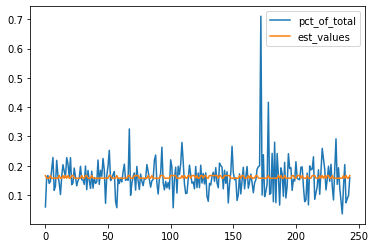

In [11]:
data[["pct_of_total","est_values"]].plot()

<AxesSubplot:>

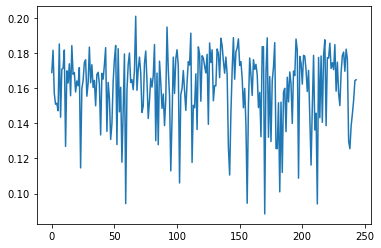

In [14]:
model2: smf.ols = smf.ols("I(tip / total_bill) ~ I(total_bill) + C(sex)", data).fit()
model2.summary()
model2.predict(data).plot()

NameError: name 'model2' is not defined